<a href="https://colab.research.google.com/github/fxop0218/PyTorchForBeginners/blob/main/Classification_PyTorch_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network classification with PyTorch

**🟦EN**: Classification is a problem of prediction whether comething is one thing or another (there can be multiple things as the option)

**🟥ES**: La clasificación es un problema de predicción si comething es una cosa u otra (puede haber múltiples cosas como la opción)

## 1. Data

Make classification and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1500

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=10)

In [ ]:
len(X), len(y)

(1500, 1500)

In [ ]:
print(f"Samples X:\n{X[:5]}\nSamples Y:\n{y[:5]}")

Samples X:
[[ 0.53587933 -0.82031212]
 [ 0.85831326  0.41626779]
 [-0.39942903 -0.65131878]
 [-0.02095879 -0.78382092]
 [-0.62363349  0.53683231]]
Samples Y:
[0 0 1 1 1]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.535879,-0.820312,0
1,0.858313,0.416268,0
2,-0.399429,-0.651319,1
3,-0.020959,-0.783821,1
4,-0.623633,0.536832,1
5,-0.628247,0.835893,0
6,-0.452196,-0.684702,1
7,0.282950,0.758301,1
8,0.708247,0.613602,0
9,-0.471695,-0.605710,1


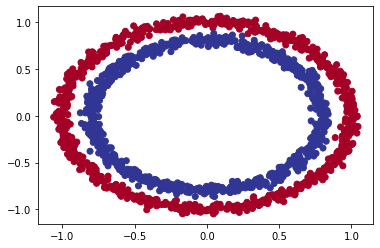

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)


**🟦EN**: The challenge is to classify in which of the circles the dot is located, red or blue.

**🟥ES**: El reto consiste en clasificar en cual de los circulo se encuentra el punto, si en el rojo o en el azul.

In [ ]:
print(f"X shape: {X.shape}, Y shape: {y.shape}")

X shape: (1500, 2), Y shape: (1500,)


#### View feature examples

In [ ]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and theis label {y_sample}\nShapes for one sample of X: {X_sample.shape} and their label {y_sample.shape}")

Values for one sample of X: [ 0.53587933 -0.82031212] and theis label 0
Shapes for one sample of X: (2,) and their label ()


### Turn data into tensors and create train and test splits

In [ ]:
# Data -> tensors
import torch

# Transform into tensor

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(f"X type: {type(X)} X DataType: {X.dtype}\nY type: {type(y)} Y DataType: {y.dtype} ")

X type: <class 'torch.Tensor'> X DataType: torch.float32
Y type: <class 'torch.Tensor'> Y DataType: torch.float32 


### Train / test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(f"X Train: {len(X_train)} // Test: {len(X_test)}")
print(f"y Train: {len(y_train)} // Test: {len(y_test)}")

X Train: 1200 // Test: 300
y Train: 1200 // Test: 300


## 2. Build a model

**🟦EN**: We want:
1. Setup device agonistic code so our code will run on an acceleratos (GPU // TPU) if there is one.
2. Construct a model (by subclassign `nn.Module`).
3. Define a loss function and optimizer.
4. Create a training and test loop.

**🟥ES**: Queremos:
1. Configurar código agonístico del dispositivo para que nuestro código se ejecute en un aceleratos (GPU // TPU) si lo hay.
2. Construir un modelo (subclasificando `nn.Module`).
3. 3. Definir una función de pérdida y un optimizador.
4. 4. Crear un bucle de entrenamiento y prueba.

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


**🟦EN**: Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module`(almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linears()` layers that are capable of handling the shapes our data.
3. Define a `forward()` method that outlines the forward pass (or frward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`
**🟥ES**: Ahora que hemos configurado el código agnóstico de dispositivo, vamos a crear un modelo que:

1. Subclase `nn.Module`(casi todos los modelos en PyTorch subclase `nn.Module`)
2. 2. Cree 2 capas `nn.Linears()` que sean capaces de manejar las formas de nuestros datos.
3. 3. Definir un método `forward()` que esboce el paso hacia adelante (o cálculo hacia adelante) del modelo.
4. Instatiate una instancia de nuestra clase de modelo y enviarlo a la `device` de destino

In [ ]:
IN_FEAT = len(X_train.shape)
OUT_FEAT = len(y_train.shape)

print(f"in_features: {IN_FEAT} \\ out_features: {OUT_FEAT}")

in_features: 2 \ out_features: 1


In [ ]:

# Contruct model
class CircleClassV1(nn.Module):
  def __inti__(self): 
    super().__init__()
    # Create linear layers capable of handling the shapes of our data. 
    # self.layer_1 = nn.Linear(in_features=IN_FEAT, out_features=5) # Take in 2 features and upscales to 5 features
    # self.layer_2 = nn.Linear(in_features=5, out_features=OUT_FEAT) # Take in 5 features from previous layer and output a single feature

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=IN_FEAT, out_features=5),
        nn.Linear(in_features=5, out_features=OUT_FEAT)
    )

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x => l1 => l2 => OP

  # Instantiate an instance of our model class and send it to the target device


In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.
    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
model_circle = CircleClassV1().to(device)
model_circle

CircleClassV1()

In [ ]:
model_circleV2 = nn.Sequential(
    nn.Linear(in_features=IN_FEAT, out_features=5),
    nn.Linear(in_features=5, out_features=OUT_FEAT)
).to(device)

model_circleV2

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_circle.state_dict()

OrderedDict()

In [ ]:
untrained_predictions = model_circleV2(X_test.to(device))
print(f"Predictions length: {len(untrained_predictions)}, Shape: {untrained_predictions.shape}\nTest length {len(X_test)} Test Shape: {X_test.shape}")
print(f"5 firsts predictions: {untrained_predictions[:5]}\5 firsts labels: {y_test[:5]}")

Predictions length: 300, Shape: torch.Size([300, 1])
Test length 300 Test Shape: torch.Size([300, 2])
5 firsts predictions: tensor([[0.1622],
        [0.3309],
        [0.2876],
        [0.5611],
        [0.4671]], grad_fn=<SliceBackward0>) firsts labels: tensor([0., 1., 1., 0., 1.])


### 2.1 Setup loss function and optimizer

**🟦EN**: Which loss function or optimizer shoudl you use

In this problem, for exemple regression you might want MAE (Mean absolute error) or MSE (mean squared error).

As a reminder, the loss function measures how *wrong* your models prediction are

And for optimizers two of the most common and useful are SGD or Adam, howeber PyTorch has many built-in options.

* For the loss functiosn we're going to use `torch.nn.VECWithLogitsLoss()`, for more on what binary cross entropy (BCE).

* For a definition on what logit is in deep learning

* Different optimizers see `torch.optim`

**🟥ES**: ¿Qué función de pérdida u optimizador debería utilizar?

En este problema, por ejemplo de regresión, es posible que desee MAE (error absoluto medio) o MSE (error cuadrático medio).

Como recordatorio, la función de pérdida mide lo *equivocada* que es la predicción de tu modelo.

Y para los optimizadores dos de los más comunes y útiles son SGD o Adam, aunque PyTorch tiene muchas opciones incorporadas.

* Para la función de pérdida vamos a utilizar `torch.nn.VECWithLogitsLoss()`, para más información sobre lo que es la entropía cruzada binaria (BCE).

* Para una definición de lo que es logit en deep learning

* Diferentes optimizadores ver `torch.optim`.

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # BCEWWithLogitsLoss => Sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_circleV2.parameters(),
                            lr = 0.05)

In [ ]:
# Calcula accuracy - Out of 100 exemples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3.Train the model

**🟦EN**:
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

**🟥ES**:
1. Pase hacia delante
2. Calcular la pérdida
3. Optimizador cero grad
4. Pérdida hacia atrás (backpropagation)
5. Paso del optimizador (descenso de gradiente)


### 3.1 Going from raw logits => predictions probabilities => prediction labels.

**🟦EN**: The outputs of our model will be raw **logits**.

We can convert these **logits** into prediction probability by passing them to some kind of activation function (sigmoid, binay class, etc...).

Then we can convert the prediction probabilities of our model into **prediction labels** by rounding them or taking the `argmax()` value.

**🟥ES**: Las salidas de nuestro modelo van a ser **logits** en bruto

Podemos convertir estos **logits** en probabilidad de predicción pasándolos a algún tipo de función de activación (sigmoide, binay class, etc...)

Luego podemos convertir las probabilidades de predicción de nuestro modelo en **etiquetas de predicción** redondeándolas o tomando el valor `argmax()`.

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_circleV2.eval()

with torch.inference_mode():
  y_log = model_circleV2(X_test.to(device))[:5]
  
y_log

tensor([[0.1622],
        [0.3309],
        [0.2876],
        [0.5611],
        [0.4671]])

**🟦EN**: We need these numbers to be 0 or 1

**🟥ES**: Necesitamos que estos numeros sean 0 o 1

In [ ]:
# Use sigmoid activaton function in prediction probs

y_preds = torch.sigmoid(y_log)
y_preds

tensor([[0.5405],
        [0.5820],
        [0.5714],
        [0.6367],
        [0.6147]])

In [ ]:
# if 0.5 < y_preds[x] == 1 // if 0.5 > y_preds[x] == 0
y_preds = torch.round(y_preds)
y_preds_label = torch.round(torch.sigmoid(model_circleV2(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_preds_label.squeeze()))

tensor([True, True, True, True, True])


### 3.1 Build training / testing loop 

In [ ]:
 torch.manual_seed(10)
 torch.cuda.manual_seed(10)

 # Set the number of epochs
 epochs = 100

# Put training data to device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Train
  model_circleV2.train()

  # Forward pass
  y_log = model_circleV2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_log)) # turn logits => preds probs => pred labels

  # 2. Calculate loss and accuracy

  loss = loss_fn(y_log, y_train) # Expects raw logits as imput.

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step "gradient descent"
  optimizer.step()

  # Testing
  model_circle.eval()
  with torch.inference_mode():

    test_log = model_circleV2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_log))

    # Calculate test loss/accuracy
    test_loss = loss_fn(test_log, y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # Print info
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.2f} | Test accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70987 | Accuracy: 50.25% | Test loss: 0.71 | Test accuracy: 49.00%
Epoch: 10 | Loss: 0.70155 | Accuracy: 50.25% | Test loss: 0.70 | Test accuracy: 49.00%
Epoch: 20 | Loss: 0.69753 | Accuracy: 50.25% | Test loss: 0.70 | Test accuracy: 49.00%
Epoch: 30 | Loss: 0.69557 | Accuracy: 51.25% | Test loss: 0.69 | Test accuracy: 50.67%
Epoch: 40 | Loss: 0.69460 | Accuracy: 58.83% | Test loss: 0.69 | Test accuracy: 55.33%
Epoch: 50 | Loss: 0.69410 | Accuracy: 54.33% | Test loss: 0.69 | Test accuracy: 52.00%
Epoch: 60 | Loss: 0.69383 | Accuracy: 52.83% | Test loss: 0.69 | Test accuracy: 50.33%
Epoch: 70 | Loss: 0.69367 | Accuracy: 52.33% | Test loss: 0.69 | Test accuracy: 51.67%
Epoch: 80 | Loss: 0.69357 | Accuracy: 51.42% | Test loss: 0.69 | Test accuracy: 50.67%
Epoch: 90 | Loss: 0.69350 | Accuracy: 50.83% | Test loss: 0.69 | Test accuracy: 50.67%


4. Make predictions and evaluate the model

form the metrics it look like out model isn't 

In [ ]:
import requests
from pathlib import Path

